<a href="https://colab.research.google.com/github/lucasquemelli/House_Rocket_Machine_Learning/blob/main/House_Rocket_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

# 1.1 Data Description 

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
def data_shape(data):
    print("Shape of the dataset")
    print("\nNumber of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
    
    return None

def num_attributes(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe number of attribute is:", num_attributes)
    
    return num_attributes

def attributes(data):
    attributes = data.drop(['id','date'], axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def data_info(data):
    print("\n\nData types\n")
    data.info()
    
    return None

def descriptive_analysis(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print("\n\nDescriptive analysis:\n\n",data.describe().T)
    
    return None

def display(data):
    #Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
    print("\n\nAttributes unique values")
    print("\n\nUnique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
    print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
    print("\nUnique values for floors:", np.sort(data['floors'].unique()))
    print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
    print("\nUnique values for view:", np.sort(data['view'].unique()))
    print("\nUnique values for condition:", np.sort(data['condition'].unique()))
    print("\nUnique values for grade:", np.sort(data['grade'].unique()))
    
    return None

if __name__ == '__main__':
    
    data_shape(data)
    
    num_attributes = num_attributes(data)
    
    attributes = attributes(data)
    
    data_info(data)
    
    descriptive_analysis(data)
    
    display(data)

Shape of the dataset

Number of rows: 21613
Number of columns: 21


The number of attribute is: 19


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  in

**Meaning of the attributes**

- ID: identification number
- date: period in which the properties were available
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- floors: number of floors
- waterfront: if some property has waterfront or not (0 or 1)
- view: number of views
- condition: condition of the properties (1 to 5)
- grade: quality of the building and construction level
- price: price of the property
- sqft_living: living room built area [ft²]
- sqft_lot: lot area [ft²]
- sqft_above: built area above ground level [ft²]
- sqft_basement: built basement area [ft²]
- yr_built: year that the property was built
- yr_renovated: year of renovation
- sqft_living15: average built area of the 15 nearest neighboring properties [ft²]
- sqft_lot15: average lot area of the 15 nearest neighboring properties [ft²]
- zipcode: number of zipcode
- lat: latitude identification number
- long: longitude identification number

# 1.2 Data Cleaning

In [5]:
def missing_values(data):
    print("Missing values\n")
    print(data.isna().sum())
    
    return None

def ids(data):
    ids = data['id']
    
    return ids

def duplicates_id(data):
    print("\n\nDuplicates\n")
    print(data[ids.isin(ids[ids.duplicated()])].sort_values('id'))
    
    return None

if __name__ == '__main__':
    
    missing_values(data)
    
    ids = ids(data)
    
    duplicates_id(data)

Missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Duplicates

               id             date     price  ...    long  sqft_living15  sqft_lot15
2497      1000102  20150422T000000 300000.00  ... -122.21           2060        7316
2496      1000102  20140916T000000 280000.00  ... -122.21           2060        7316
16814     7200179  20141016T000000 150000.00  ... -122.21           1480        6969
16815     7200179  20150424T000000 175000.00  ... -122.21           1480        6969
11434   109200390  20141020T000000 250000.00  ... -122.37           1830        6956
...           ...              ...       ...  ..

Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time.

## 1.3. Data Conversion

In [6]:
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers

We may see the outliers in the dataset using the boxplot chart:

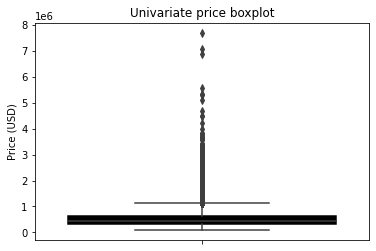

In [7]:
ax = sns.boxplot(y='price',data=data)
ax.set_title("Univariate price boxplot")
ax.set_ylabel("Price (USD)")

mybox = ax.artists[0]
mybox.set_facecolor('black')
mybox.set_edgecolor('black')
#mybox.set_linewidth(3)

As it may be seen above, this is an univariate analysis. As the price is influenced by a lot of features in the dataset, we must remove outliers using multivariate analysis.
To remove outliers using multivariate analysis, we are going to use two methods: **Z-score method** and **interquartile range method**. 

Firstly, in order to use the methods Z-score and interquartile range, we have to set the column 'date' as integer as follows:

In [8]:
df1 = data.copy()
df1['date'] = df1['date'].view(np.int64)

### 1.4.1 **Z-score method** 

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured."

"The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution."

"Calculating the Z-score, we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers."

In this case (project), a threshold of 3 was used. For instance, when the Z-score value was greater than 3, that data point was identified as an outlier.

In [9]:
def standardization_data(df1):
    z1 = np.abs(stats.zscore(df1.drop(columns=['id','date'])))
    print("Standardized dataset:\n\n", z1)
    
    return z1

def show_index_outliers(z1):
    #Defining threshold as 3
    threshold = 3
    
    print("\n\nIndexes of the outliers:\n\n",np.where(z1 > threshold))
    
    return None

def show_first_outlier(z1):
    print("\n\nValue of the first outlier:\n\n",z1[1][13])
    
    return None

def removing_outliers(df1, z1):
    df2 = df1[(z1 < 3).all(axis=1)]
    
    return df2

def show_new_shape(df2):
    print("\n\nShape of the clean dataset:\n\nNumber of rows:", df2.shape[0])
    print("Number of columns:", df2.shape[1])
    
    return None

if __name__ == '__main__':
    
    z1 = standardization_data(df1)
    
    show_index_outliers(z1)
    
    show_first_outlier(z1)
    
    df2 = removing_outliers(df1, z1)
    
    show_new_shape(df2)

Standardized dataset:

 [[0.86671733 0.39873715 1.44746357 ... 0.30607896 0.9433552  0.26071541]
 [0.00568792 0.39873715 0.1756067  ... 0.74634143 0.43268619 0.18786773]
 [0.98084935 1.47395936 1.44746357 ... 0.13565477 1.07013975 0.17237524]
 ...
 [0.37586519 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.39414129]
 [0.38158814 0.39873715 0.50022075 ... 1.02891048 0.8412214  0.42051149]
 [0.58588173 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.41794772]]


Indexes of the outliers:

 (array([    1,     5,     5, ..., 21590, 21590, 21600]), array([13,  2,  3, ..., 11, 17, 10]))


Value of the first outlier:

 4.746677600764257


Shape of the clean dataset:

Number of rows: 18702
Number of columns: 21


### 1.4.2 Interquartile range (IQR) method

Box plot use the IQR method to display data and outliers(shape of the data). The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

"It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

In [10]:
def quartiles(df1):
    Q1 = df2.drop(columns=['id','date']).quantile(0.25)
    Q3 = df2.drop(columns=['id','date']).quantile(0.75)
    
    return Q1, Q3

def IQR_function(Q1, Q3):
    IQR = Q3 - Q1
    print("Interquartile range:\n\n",IQR)
    
    return IQR

def show_boolean_outliers(df2, Q1, Q3, IQR):
    print("\n\nBoolean values:\n\n",(df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR)))
    
    return None

def removing_outliers(df2, Q1, Q3, IQR):
    df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df3

def show_dimensions_dataset(df3):
    print("\n\nShape of the clean dataset:\n\n",df3.shape)
    
    return None

def copy_data_clean(df3):
  data = df3.copy()

  return data

if __name__ == '__main__':
    
    Q1, Q3 = quartiles(df1)
    
    IQR = IQR_function(Q1, Q3)
    
    show_boolean_outliers(df2, Q1, Q3, IQR)
    
    df3 = removing_outliers(df2, Q1, Q3, IQR)
    
    show_dimensions_dataset(df3)

    data = copy_data_clean(df3)

Interquartile range:

 price           287000.00
bedrooms             1.00
bathrooms            1.00
sqft_living       1019.00
sqft_lot          4881.50
floors               1.00
waterfront           0.00
view                 0.00
condition            1.00
grade                1.00
sqft_above         924.50
sqft_basement      500.00
yr_built            44.00
yr_renovated         0.00
zipcode             85.00
lat                  0.21
long                 0.19
sqft_living15      790.00
sqft_lot15        4600.00
dtype: float64


Boolean values:

        bathrooms  bedrooms  condition  ...  yr_built  yr_renovated  zipcode
0          False     False      False  ...     False         False    False
2          False     False      False  ...     False         False    False
3          False     False      False  ...     False         False    False
4          False     False      False  ...     False         False    False
6          False     False      False  ...     False         False  